In [5]:
import numpy as np
import pandas as pd

In [6]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding="latin-1")


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1784,ham,"Dont search love, let love find U. Thats why i...",NaN,NaN,NaN
5152,ham,Idk. I'm sitting here in a stop and shop parki...,NaN,NaN,NaN
4672,ham,I forgot 2 ask Ì_ all smth.. There's a card on...,NaN,NaN,NaN
959,ham,Where @,NaN,NaN,NaN
2435,ham,Oh ya ya. I remember da. .,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [12]:
df.sample(5)

,v1,v2
2927,ham,Anything...
1787,ham,Yes:)sura in sun tv.:)lol.
3206,ham,This phone has the weirdest auto correct.
2318,ham,On the way to office da..
4712,ham,Big brotherÛ÷s really scraped the barrel with...


In [13]:
# renaming the cols
df.rename(columns= {'v1' : 'target' , 'v2' : 'text'},inplace = True)
df.sample(5)

,target,text
4121,ham,Doc prescribed me morphine cause the other pai...
386,ham,Customer place i will call you.
5238,ham,Yeah I can still give you a ride
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...
311,spam,Think ur smart ? Win å£200 this week in our we...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [19]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5169, 2)

## 2.EDA

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

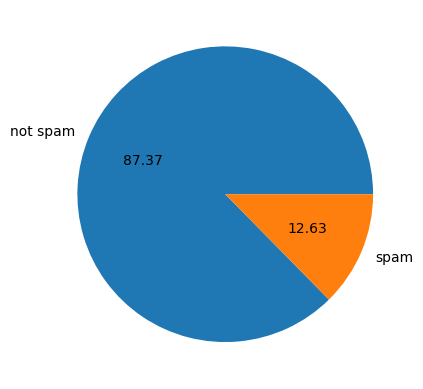

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['not spam','spam'],autopct = "%0.2f")
plt.show()

In [25]:
# Data is imbalanced

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:

#not spam
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

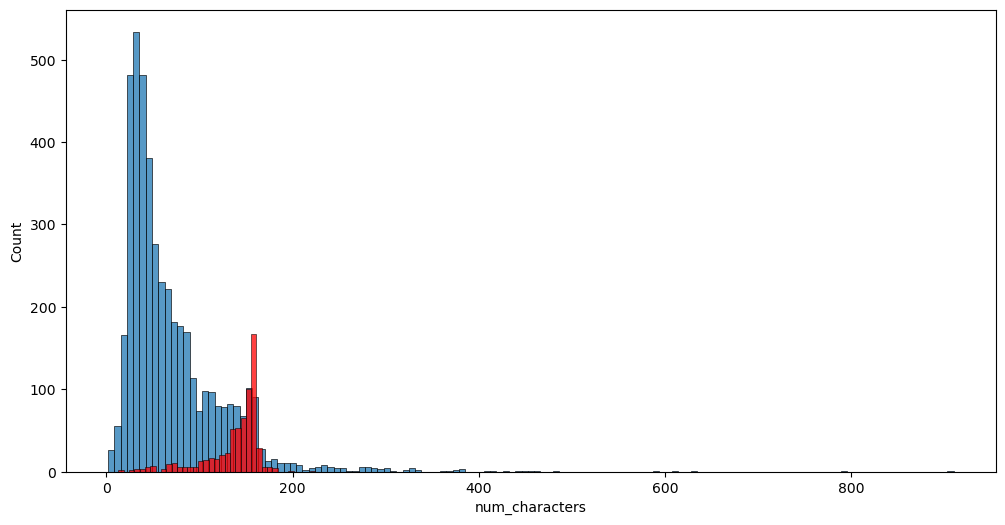

In [38]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

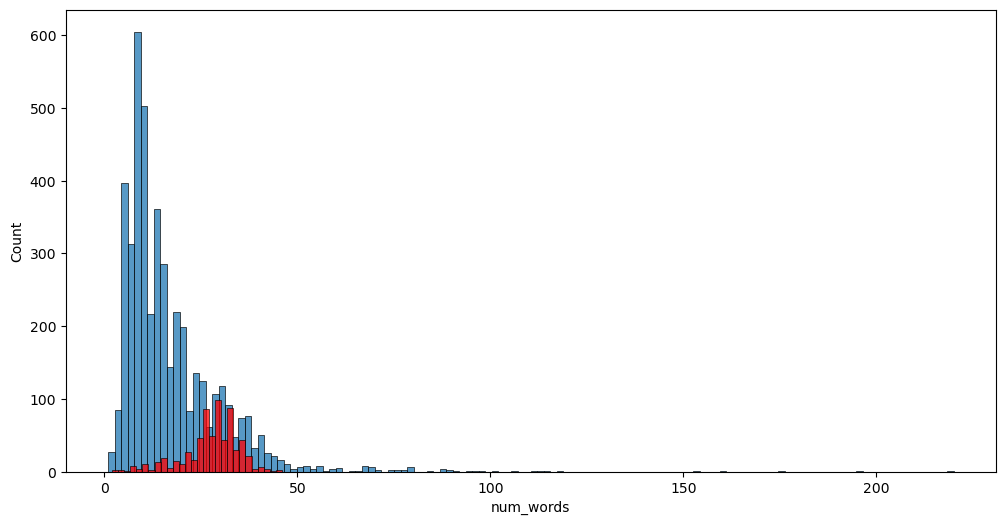

In [39]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

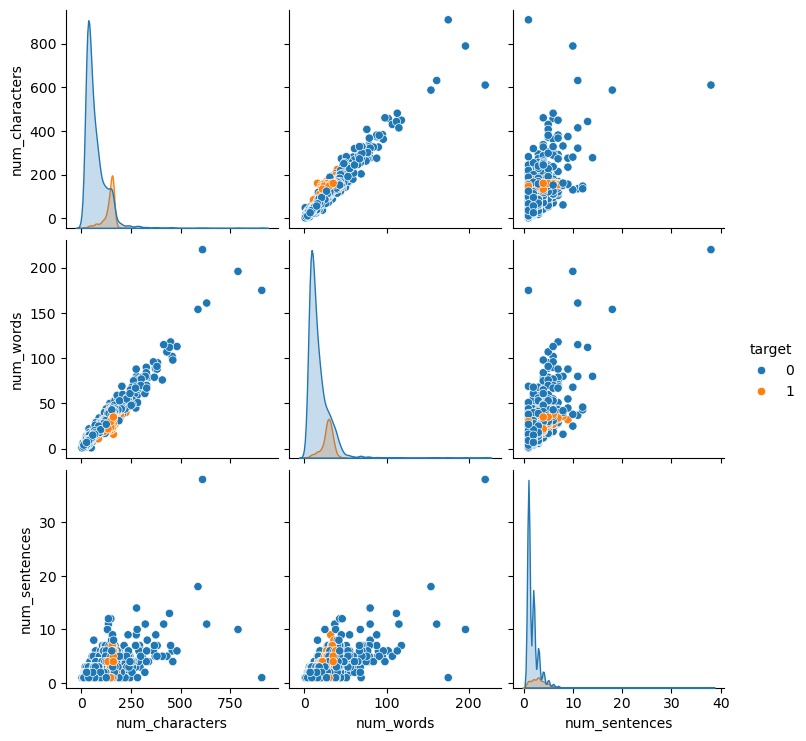

In [40]:

sns.pairplot(df,hue='target')

<Axes: >

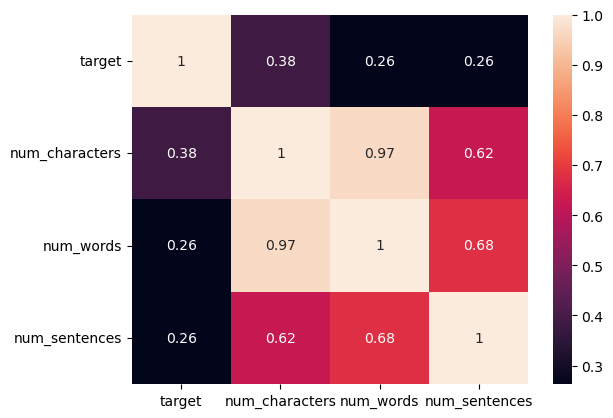

In [41]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## 3. Data Preprocessing


In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)

    return " ".join(y)


In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

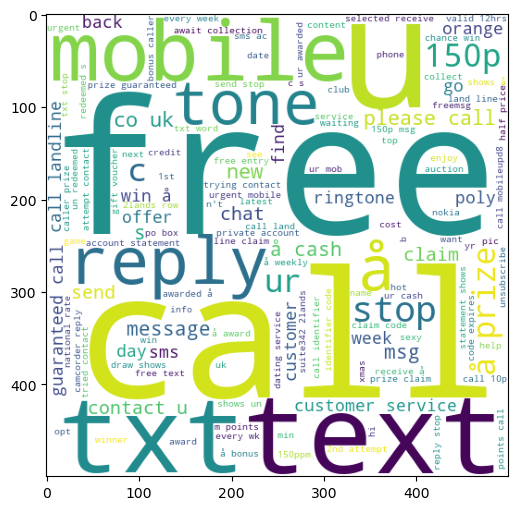

In [49]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

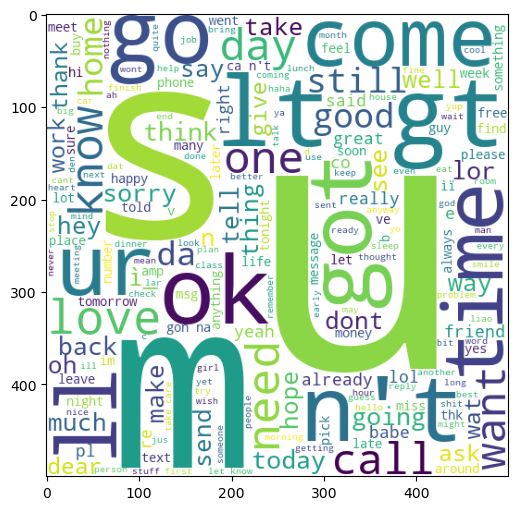

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [53]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [54]:

len(spam_corpus)

11083

In [55]:
from collections import Counter
import pandas as pd

spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)


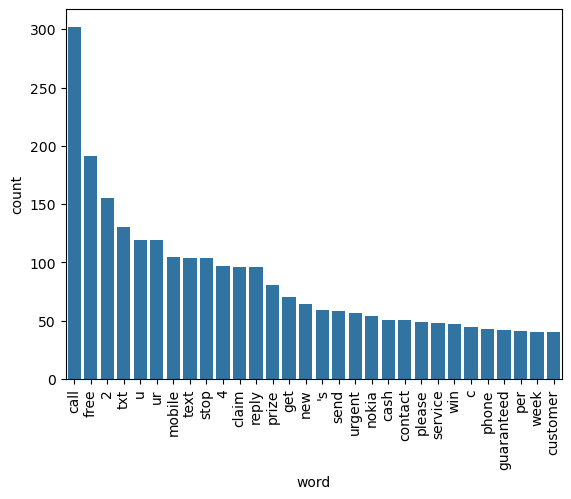

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation=90)
plt.show()

In [57]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


## 4. Model Building

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [61]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [62]:

X.shape

(5169, 3000)

In [63]:

y = df['target'].values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8810444874274661
[[794 102]
 [ 21 117]]
0.5342465753424658


In [69]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [71]:

# tfidf --> MNB

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [74]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [75]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [76]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8958333333333334
For  LR
Accuracy -  0.9506769825918762
Precision -  0.9578947368421052
For  RF
Accuracy -  0.9777562862669246
Precision -  1.0
For  AdaBoost
Accuracy -  0.9284332688588007
Precision -  0.9102564102564102
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8888888888888888
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9247311827956989
For  xgb
Accuracy -  0.971953578336557
Precision -  0.9658119658119658


In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.976789,1.000000
5,RF,0.977756,1.000000
8,ETC,0.981625,0.983740
0,SVC,0.976789,0.975000
10,xgb,0.971954,0.965812
4,LR,0.950677,0.957895
9,GBDT,0.942940,0.924731
6,AdaBoost,0.928433,0.910256
3,DT,0.940039,0.895833


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [82]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.976789
2,RF,Accuracy,0.977756
3,ETC,Accuracy,0.981625
4,SVC,Accuracy,0.976789
5,xgb,Accuracy,0.971954
6,LR,Accuracy,0.950677
7,GBDT,Accuracy,0.942940
8,AdaBoost,Accuracy,0.928433
9,DT,Accuracy,0.940039


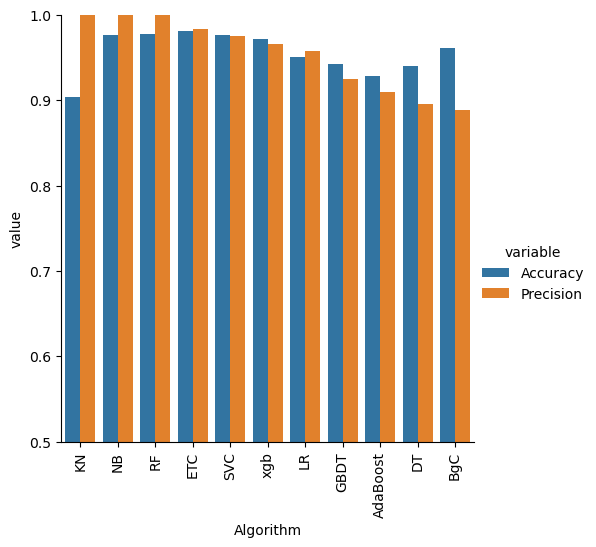

In [83]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [88]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [89]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [91]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,RF,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000
3,ETC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
4,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
5,xgb,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812,0.971954,0.965812
6,LR,0.950677,0.957895,0.950677,0.957895,0.950677,0.957895,0.950677,0.957895
7,GBDT,0.942940,0.924731,0.942940,0.924731,0.942940,0.924731,0.942940,0.924731
8,AdaBoost,0.928433,0.910256,0.928433,0.910256,0.928433,0.910256,0.928433,0.910256
9,DT,0.940039,0.895833,0.940039,0.895833,0.940039,0.895833,0.940039,0.895833


In [92]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [94]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9838709677419355


In [97]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:

from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9696969696969697


In [101]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [102]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# TRAIN MODEL
clf = MultinomialNB()
clf.fit(X_train, y_train)

# SAVE TRAINED OBJECTS
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))

print("Model saved successfully")


Model saved successfully
